# What matters: Words that lead to positive/negative reviews

# Group members
Huanci Wang hw1685 (Member responsible for upload) 
Shuxuan Liu sl6166

# Introduction
According to Investopia, a comparative advantage gives a company the ability to sell goods and services at a lower price than its competitors and realize stronger sales margins. Through an investigation of Yelp’s review dataset, we hope to find the comparative advantages and disadvantages through numerous consumers’ reviews. 
By classifying the positive and negative reviews, we find the words that contribute the most to positive and negative reviews, therefore, learn the aspects of a business that are important to customers.

## clean data

In [2]:
import pandas as pd

df = pd.read_json('review.json',lines=True)
df = df[df['useful'] >= 5]
df

review_id                 user_id             business_id  \
0      Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
4      11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   
6      G7XHMxG0bx9oBJNECG4IFg  jlu4CztcSxrKx56ba1a5AQ  3fw2X5bZYeW9xCz_zGhOHg   
21     IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw  Mem13A3C202RzT53npn4NA   
26     W1wbNaUnbMy4b9QqY3_SAg  vDr8hBNYigiY70fk1kF5iQ  hd5xm20tfSa70-6UqD9-bg   
...                       ...                     ...                     ...   
65313  2IdHjkZHu2Rjb-BPRarL_A  zSvhGdZ_pIROn91S_VZgww  r_W5vN-Q6-90Tk9CLO1Iew   
65344  uJZ-7-BSuGQEOeNoQQJEdg  -ZsAF6YOSzfCwRMvwgkwHw  J64Yg3hQJXSI-ipnfJUkiw   
65345  1oXJnTGuIrK8iSc5OGz73A  yXIFCpTAJkKzyoWXm4opqg  FUfhU3aUnzTycLjRvImZBg   
65349  KxduxpwDfSyqy4jOu56Okw  fCExFIeu2BT35FSx2Yz2aA  XwV2-lISDp_5Acy72bA8Qg   
65367  I1P7hMT7kXt6UCj2hYH8SA  uaM5GzwOq2VSUnDDhUzxcw  X87kIA0UsVeXl_IorxHpeA   

       stars  useful  funny  cool  \
0          1       6      1     0   
4          1       7      0     0   
6          3       5      4     5   
21         5       9      6     9   
26         1       7      1     1   
...      ...     ...    ...   ...   
65313      2       5      0     0   
65344      1      12      1     2   
65345      1       8      8     9   
65349      5       7      0     0   
65367      1       5      0     0   

                                                    text                date  
0      Total bill for this horrible service? Over $8G... 2013-05-07 04:34:36  
4      Today was my second out of three sessions I ha... 2018-01-30 23:07:38  
6      Tracy dessert had a big name in Hong Kong and ... 2016-05-07 01:21:02  
21     If you are looking for the best pierogies in P... 2017-05-13 10:41:43  
26     Unfortunately, I must recommend not to conduct... 2014-08-10 22:07:35  
...                                                  ...                 ...  
65313  We went into this location ready to purchase a... 2014-07-30 15:40:14  
65344  Last night they didn't show up to take me to t... 2011-01-13 21:46:48  
65345  (1.50 stars)  When I'm about to board a 5 hour... 2012-02-04 21:11:37  
65349  The Platinum was a fantastic place to stay her... 2016-06-24 20:43:08  
65367  Purchased voucher through Amazon Local about a... 2013-11-16 16:57:53  

[4389 rows x 9 columns]

In [3]:
df.isnull().all()

review_id      False
user_id        False
business_id    False
stars          False
useful         False
funny          False
cool           False
text           False
date           False
dtype: bool

## code

In [4]:
import nltk
import nltk.corpus

from nltk.tokenize import word_tokenize

from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

import spacy
import numpy as np

nltk.download('punkt')
SENT_DETECTOR = nltk.data.load('tokenizers/punkt/english.pickle')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/sl6166/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sl6166/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sl6166/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
text = list(df['text'])
text_tokens = []
for t in text:
    text_tokens.append(word_tokenize(t))
    
text_tokens

[['Total',
  'bill',
  'for',
  'this',
  'horrible',
  'service',
  '?',
  'Over',
  '$',
  '8Gs',
  '.',
  'These',
  'crooks',
  'actually',
  'had',
  'the',
  'nerve',
  'to',
  'charge',
  'us',
  '$',
  '69',
  'for',
  '3',
  'pills',
  '.',
  'I',
  'checked',
  'online',
  'the',
  'pills',
  'can',
  'be',
  'had',
  'for',
  '19',
  'cents',
  'EACH',
  '!',
  'Avoid',
  'Hospital',
  'ERs',
  'at',
  'all',
  'costs',
  '.'],
 ['Today',
  'was',
  'my',
  'second',
  'out',
  'of',
  'three',
  'sessions',
  'I',
  'had',
  'paid',
  'for',
  '.',
  'Although',
  'my',
  'first',
  'session',
  'went',
  'well',
  ',',
  'I',
  'could',
  'tell',
  'Meredith',
  'had',
  'a',
  'particular',
  'enjoyment',
  'for',
  'her',
  'male',
  'clients',
  'over',
  'her',
  'female',
  '.',
  'However',
  ',',
  'I',
  'returned',
  'because',
  'she',
  'did',
  'my',
  'teeth',
  'fine',
  'and',
  'I',
  'was',
  'pleased',
  'with',
  'the',
  'results',
  '.',
  'When',
  'I

In [6]:
lemmatizer = WordNetLemmatizer()

new_text_tokens = []
for t in text_tokens:
    for w in t:
        new_text_tokens.append(lemmatizer.lemmatize(w))
new_text_tokens

['Total',
 'bill',
 'for',
 'this',
 'horrible',
 'service',
 '?',
 'Over',
 '$',
 '8Gs',
 '.',
 'These',
 'crook',
 'actually',
 'had',
 'the',
 'nerve',
 'to',
 'charge',
 'u',
 '$',
 '69',
 'for',
 '3',
 'pill',
 '.',
 'I',
 'checked',
 'online',
 'the',
 'pill',
 'can',
 'be',
 'had',
 'for',
 '19',
 'cent',
 'EACH',
 '!',
 'Avoid',
 'Hospital',
 'ERs',
 'at',
 'all',
 'cost',
 '.',
 'Today',
 'wa',
 'my',
 'second',
 'out',
 'of',
 'three',
 'session',
 'I',
 'had',
 'paid',
 'for',
 '.',
 'Although',
 'my',
 'first',
 'session',
 'went',
 'well',
 ',',
 'I',
 'could',
 'tell',
 'Meredith',
 'had',
 'a',
 'particular',
 'enjoyment',
 'for',
 'her',
 'male',
 'client',
 'over',
 'her',
 'female',
 '.',
 'However',
 ',',
 'I',
 'returned',
 'because',
 'she',
 'did',
 'my',
 'teeth',
 'fine',
 'and',
 'I',
 'wa',
 'pleased',
 'with',
 'the',
 'result',
 '.',
 'When',
 'I',
 'went',
 'in',
 'today',
 ',',
 'I',
 'wa',
 'in',
 'the',
 'whitening',
 'room',
 'with',
 'three',
 'other',

In [7]:
tags = []
for w in new_text_tokens:
    tags.append(nltk.pos_tag([w]))
#tags

In [8]:
"""bi_tokens = list(nltk.bigrams(new_text_tokens))
bi_tokens"""

'bi_tokens = list(nltk.bigrams(new_text_tokens))\nbi_tokens'

In [9]:
"""final_text_tokens = []
needed_tags = ['JJ','JJR','JJS','NN','NNP','NNPS','RB','RBB','RBS','RP','VB','VBD','VBG','VBN','VBP','VBZ']
for tag in tags:
    if tag[0][1] in needed_tags:
        final_text_tokens.append(tag[0][0])
        
final_text_tokens"""

"final_text_tokens = []\nneeded_tags = ['JJ','JJR','JJS','NN','NNP','NNPS','RB','RBB','RBS','RP','VB','VBD','VBG','VBN','VBP','VBZ']\nfor tag in tags:\n    if tag[0][1] in needed_tags:\n        final_text_tokens.append(tag[0][0])\n        \nfinal_text_tokens"

In [10]:
"""from spacy.matcher import Matcher 
! python -m spacy download en_core_web_md
#import en_core_web_md

nlp = spacy.load('en_core_web_md')
doc = nlp(''.join(new_text_tokens))
pattern = [{'POS':'ADJ'},{'POS':'NOUN'}]
match = Matcher(nlp.vocab)
match.add('pattern',None,pattern)
matches = matcher(doc)"""



"from spacy.matcher import Matcher \n! python -m spacy download en_core_web_md\n#import en_core_web_md\n\nnlp = spacy.load('en_core_web_md')\ndoc = nlp(''.join(new_text_tokens))\npattern = [{'POS':'ADJ'},{'POS':'NOUN'}]\nmatch = Matcher(nlp.vocab)\nmatch.add('pattern',None,pattern)\nmatches = matcher(doc)"

In [11]:
from  nltk.probability import FreqDist

fdist = FreqDist()
for w in new_text_tokens:
    fdist[w] = fdist[w] + 1
fdist

FreqDist({'.': 51174, 'the': 37657, ',': 35916, 'and': 28739, 'I': 27773, 'a': 27039, 'to': 23985, 'wa': 14905, 'of': 14872, 'it': 11087, ...})

In [12]:
new_fdist = {k: v for k, v in fdist.items() if v > 30}
words_in_vocab = new_fdist.keys()
#len(word_index_map)

In [13]:
X_text = []
for t in text_tokens:
    temp = []
    for w in t:
        temp.append(lemmatizer.lemmatize(w))
    X_text.append(temp)
len(X_text)

4389

In [14]:
def convert_list_text_to_list_feature_vectors(list_texts, word_index_map):
    list_feature_vectors = []
    list_words_in_vocab = word_index_map.keys()
    no_words_in_vocab = len(list_words_in_vocab)
    for text in list_texts:
        words_in_text_n_vocab = set(text) & set(list_words_in_vocab)
        feature_vector = np.zeros(no_words_in_vocab)
        for word in words_in_text_n_vocab:
            word_ind = word_index_map[word]
            feature_vector[word_ind] = 1
        list_feature_vectors.append(feature_vector)
    return list_feature_vectors

word_index_map = dict(zip(words_in_vocab, range(len(words_in_vocab))))
train_features = convert_list_text_to_list_feature_vectors(X_text[:3000], word_index_map)
val_features = convert_list_text_to_list_feature_vectors(X_text[3000:], word_index_map)

train_features_array = np.array(train_features)
val_features_array = np.array(val_features)

print ("Shape of training features array", train_features_array.shape)
print ("Shape of val features array", val_features_array.shape)

Shape of training features array (3000, 2453)
Shape of val features array (1389, 2453)


In [15]:
y = []
for star in df['stars']:
    if star>=3:
        y.append(1)
    elif star<3:
        y.append(-1)
y_train = y[:3000]
y_val = y[3000:]

## SVM!!!

In [16]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='linear')
clf.fit(train_features_array, y_train)
print(clf.score(train_features_array, y_train))

1.0


In [17]:
print(clf.score(val_features_array, y_val))

0.8322534197264219


In [18]:
weights = clf.coef_
weights

array([[-0.13219062, -0.00043082, -0.16561044, ..., -0.03918599,
         0.22326121,  0.0003411 ]])

In [19]:
import operator
sort_map = dict(zip(list(words_in_vocab), weights[0]))
sorted_map = sorted(sort_map.items(),key=operator.itemgetter(1))
len(sorted_map)

2453

In [20]:
most_pos_wt_words = sorted_map[-50:]
most_neg_wt_words = sorted_map[:50]

print ("\nWords which correspond to the most +ve weight for SPAM classification\n")
for word in most_pos_wt_words:
    print (word)

print ("\nWords which correspond to the most -ve weight for SPAM classification\n")
for word in most_neg_wt_words:
    print (word)



Words which correspond to the most +ve weight for SPAM classification

('getting', 0.356547447563018)
('live', 0.35761117537103976)
('house', 0.3595544386331091)
('!', 0.3620403531500329)
('spot', 0.3631793276956698)
('la', 0.3637816400314767)
('New', 0.36507119693260165)
('pick', 0.3667493638739198)
('gift', 0.3672088881835014)
('donut', 0.36725989326703634)
('na', 0.3688179400014374)
('prefer', 0.3712286991207233)
('family', 0.37154392789094887)
('size', 0.3744578764188276)
('reasonable', 0.37612527309533594)
('afternoon', 0.38077964287553945)
('Prices', 0.38101077063987066)
('parent', 0.3815275895673663)
('incredibly', 0.38156036349489436)
('model', 0.3824248707911381)
('lobby', 0.3829495435227605)
('highly', 0.3899709226595094)
('fun', 0.3905871127901483)
('pet', 0.3937211903629227)
('wonderful', 0.39399851871224767)
('Valley', 0.3946743727414228)
('above', 0.39647221565536367)
('tasty', 0.39913887574156764)
('definitely', 0.39949850092535577)
('One', 0.4013521507007196)
('enjoy',

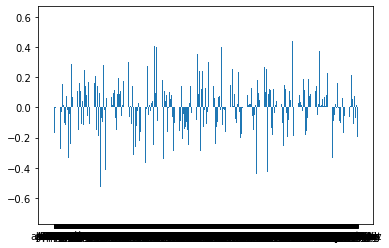

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

plt.bar(list(words_in_vocab), weights[0])
plt.show()

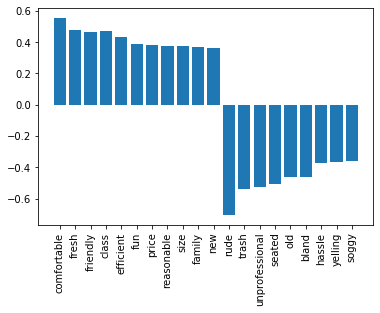

In [33]:
labels = ['comfortable','fresh','friendly','class','efficient','fun','price','reasonable','size','family','new','rude','trash','unprofessional','seated','old','bland','hassle','yelling','soggy']
heights = [0.556765,0.479543,0.46372797,0.4689555,0.4320253559493,0.390587,0.3810,0.3761,0.37446,0.3715439,0.36507,-0.70542,-0.5374,-0.5258529,-0.50319735,-0.463303,-0.45973121,-0.3697,-0.3654819,-0.35580139]
plt.bar(labels,heights )
plt.xticks(rotation = 'vertical')
plt.show()

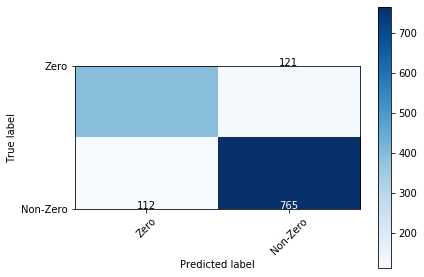

In [22]:
def plot_confusion_matrix(cm,classes):      
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)         
    plt.colorbar()    
    tick_marks = np.arange(len(classes))      
    plt.xticks(tick_marks, classes, rotation=45)      
    plt.yticks(tick_marks, classes)        

    thresh = cm.max() / 2.        
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):    
        plt.text(j, i, format(cm[i, j], 'd'),      
         horizontalalignment="center",    
         color="white" if cm[i, j] > thresh else "black")      

    plt.tight_layout()        
    plt.ylabel('True label')      
    plt.xlabel('Predicted label')


yhat = clf.predict(val_features_array)

cnf_matrix = confusion_matrix(y_val, yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Zero", "Non-Zero"])
plt.show()

In [21]:
"""from sklearn import tree
dtree_vanilla = tree.DecisionTreeRegressor()
dtree_vanilla.fit(train_features_array, y_train)"""

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
"""from sklearn.tree import export_graphviz
import pydot
# Use dot file to create a graph

feature_list = list(train_features_array.columns)

export_graphviz(dtree_vanilla, out_file = 'dtree_vanilla.dot', feature_names = feature_list, rounded = True, precision = 1)
# Write graph to a png file
(graph_vanilla, ) = pydot.graph_from_dot_file('dtree_vanilla.dot')
graph_vanilla.write_png('dtree_vanilla.png')"""

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
"""import matplotlib.pyplot as plt
def plot_decisiontree(img_name):
    tree_image = plt.imread(img_name)
    plt.figure(figsize=(100,10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tree_image)
    plt.show()
plot_decisiontree('dtree_vanilla.png')"""

In [ ]:
"""predictions = dtree_vanilla.predict(X_train)
errors = abs(predictions - y_train)
print("Mean Absolute Error for Train: ", round(np.mean(errors),2), " degrees")
#predictions = dtree_vanilla.predict(X_test)
#errors = abs(predictions - y_test)
#print("Mean Absolute Error for test: ", round(np.mean(errors),2), " degrees")"""

In [ ]:
"""# Get numerical feature importances
importances = list(dtree_vanilla.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];"""